In [3]:
import os
os.getcwd()

'/content'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
from pandas import Series
from numpy import log

import plotly.offline as ply

In [5]:
df = pd.read_csv("/content/TCS.NS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-14,2004.949951,2007.800049,1981.000000,1987.400024,1778.695557,1905495
1,2019-03-15,1998.900024,2068.949951,1991.000000,2039.949951,1825.726929,5184318
2,2019-03-18,2043.000000,2064.600098,2011.000000,2022.800049,1810.378174,2349915
3,2019-03-19,2030.000000,2030.000000,1995.099976,2022.800049,1810.378174,2373993
4,2019-03-20,2028.000000,2044.800049,2000.000000,2015.050049,1803.441895,3091165


# Facebook Prophet Time Series Forecasting Modek

In [6]:
!pip install prophet

In [7]:
import prophet

In [8]:
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-14,2004.949951,2007.800049,1981.000000,1987.400024,1778.695557,1905495
1,2019-03-15,1998.900024,2068.949951,1991.000000,2039.949951,1825.726929,5184318
2,2019-03-18,2043.000000,2064.600098,2011.000000,2022.800049,1810.378174,2349915
3,2019-03-19,2030.000000,2030.000000,1995.099976,2022.800049,1810.378174,2373993
4,2019-03-20,2028.000000,2044.800049,2000.000000,2015.050049,1803.441895,3091165


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1235 non-null   datetime64[ns]
 1   Open       1235 non-null   float64       
 2   High       1235 non-null   float64       
 3   Low        1235 non-null   float64       
 4   Close      1235 non-null   float64       
 5   Adj Close  1235 non-null   float64       
 6   Volume     1235 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.7 KB


In [12]:
len(df)

1235

In [13]:
df['Date'].nunique()

1235

In [14]:
df['Date'].min()

Timestamp('2019-03-14 00:00:00')

In [15]:
df['Date'].max()

Timestamp('2024-03-13 00:00:00')

In [16]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [17]:
total =df.groupby(['Date'])['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'].sum().reset_index()

# here we are doing groupby with date, so that if multiple transaction done in a single day,
   # so it will consider as 1 transaction using sum function for that date, but here it doesn't make difference

In [18]:
total.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-14,2004.949951,2007.800049,1981.000000,1987.400024,1778.695557,1905495
1,2019-03-15,1998.900024,2068.949951,1991.000000,2039.949951,1825.726929,5184318
2,2019-03-18,2043.000000,2064.600098,2011.000000,2022.800049,1810.378174,2349915
3,2019-03-19,2030.000000,2030.000000,1995.099976,2022.800049,1810.378174,2373993
4,2019-03-20,2028.000000,2044.800049,2000.000000,2015.050049,1803.441895,3091165


In [19]:
# Change "Date"  column to 'ds' & target column as  - 'y'
# this is the mandatory step if we use facebook prophet model


In [20]:
df_prophet =total.rename(columns ={'Date':'ds','Volume':'y'})

In [21]:
df_prophet

,ds,Open,High,Low,Close,Adj Close,y
0,2019-03-14,2004.949951,2007.800049,1981.000000,1987.400024,1778.695557,1905495
1,2019-03-15,1998.900024,2068.949951,1991.000000,2039.949951,1825.726929,5184318
2,2019-03-18,2043.000000,2064.600098,2011.000000,2022.800049,1810.378174,2349915
3,2019-03-19,2030.000000,2030.000000,1995.099976,2022.800049,1810.378174,2373993
4,2019-03-20,2028.000000,2044.800049,2000.000000,2015.050049,1803.441895,3091165
...,...,...,...,...,...,...,...
1230,2024-03-06,3994.050049,4072.000000,3958.449951,4064.300049,4064.300049,1744204
1231,2024-03-07,4065.000000,4124.000000,4037.699951,4108.600098,4108.600098,2688905
1232,2024-03-11,4089.000000,4153.000000,4089.000000,4122.350098,4122.350098,2304068
1233,2024-03-12,4122.350098,4229.950195,4121.049805,4192.250000,4192.250000,4039801


In [22]:
from prophet import Prophet

In [23]:
m = Prophet()
model =m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfaj7evps/0lw43n17.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfaj7evps/nsuqqh_7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24871', 'data', 'file=/tmp/tmpfaj7evps/0lw43n17.json', 'init=/tmp/tmpfaj7evps/nsuqqh_7.json', 'output', 'file=/tmp/tmpfaj7evps/prophet_modeljggtuomi/prophet_model-20240320171800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:18:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:18:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [25]:
# Build TimeSeries F orecasting Model for next 100 days
future_global = model.make_future_dataframe(periods =100,freq ='D')

In [26]:
future_global.tail(20)

,ds
1315,2024-06-02
1316,2024-06-03
1317,2024-06-04
1318,2024-06-05
1319,2024-06-06
1320,2024-06-07
1321,2024-06-08
1322,2024-06-09
1323,2024-06-10
1324,2024-06-11


In [28]:
len(future_global)

1335

In [31]:
prediction =model.predict(future_global)

In [33]:
prediction.head(2)
#yhat is the target variable -volume

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-03-14,1.761240e+06,1.552628e+06,5.086875e+06,1.761240e+06,1.761240e+06,1.523981e+06,1.523981e+06,1.523981e+06,9.341475e+05,9.341475e+05,9.341475e+05,589833.428616,589833.428616,589833.428616,0.0,0.0,0.0,3.285221e+06
1,2019-03-15,1.764425e+06,1.642096e+06,5.202264e+06,1.764425e+06,1.764425e+06,1.651624e+06,1.651624e+06,1.651624e+06,1.080485e+06,1.080485e+06,1.080485e+06,571138.352665,571138.352665,571138.352665,0.0,0.0,0.0,3.416048e+06


In [34]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [35]:
prediction[['ds','yhat_lower', 'yhat_upper','yhat']].tail(20)

,ds,yhat_lower,yhat_upper,yhat
1315,2024-06-02,-2.816327e+06,7.835112e+05,-1.025159e+06
1316,2024-06-03,3.220468e+04,3.667914e+06,1.919502e+06
1317,2024-06-04,3.147861e+05,3.593819e+06,1.995125e+06
1318,2024-06-05,3.122742e+04,3.554273e+06,1.762166e+06
1319,2024-06-06,2.579335e+05,3.691022e+06,2.010510e+06
1320,2024-06-07,3.722963e+05,3.995602e+06,2.113329e+06
1321,2024-06-08,-2.844127e+06,7.936976e+05,-1.028272e+06
1322,2024-06-09,-3.153804e+06,6.419781e+05,-1.289895e+06
1323,2024-06-10,-1.731702e+05,3.511250e+06,1.629463e+06
1324,2024-06-11,-1.852537e+04,3.522823e+06,1.686843e+06


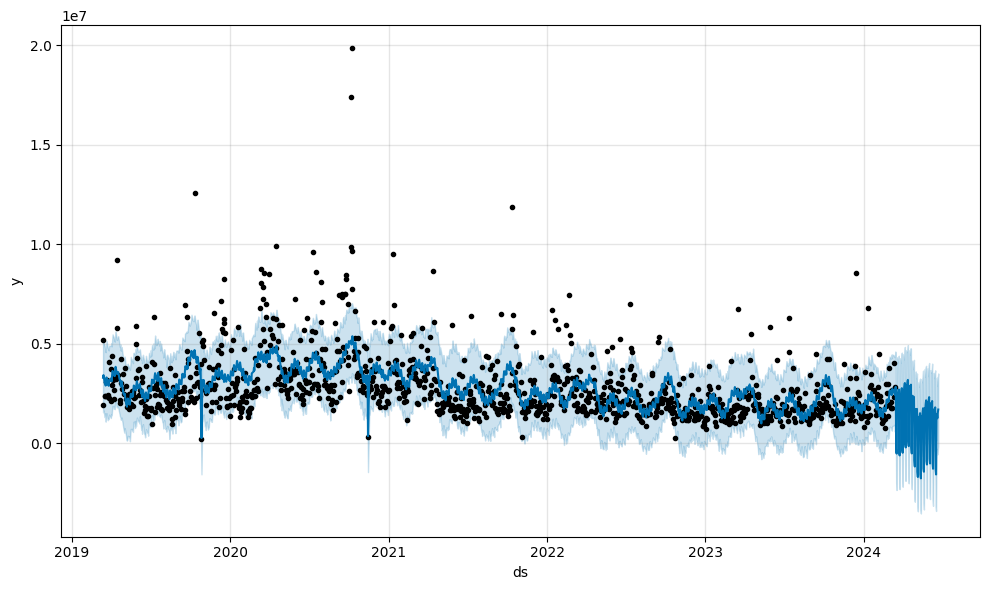

In [36]:
model.plot(prediction)
plt.show()
#black color =actual values
# blue color = Predicted values
# humps (both top and bottom) = lower and upper limits

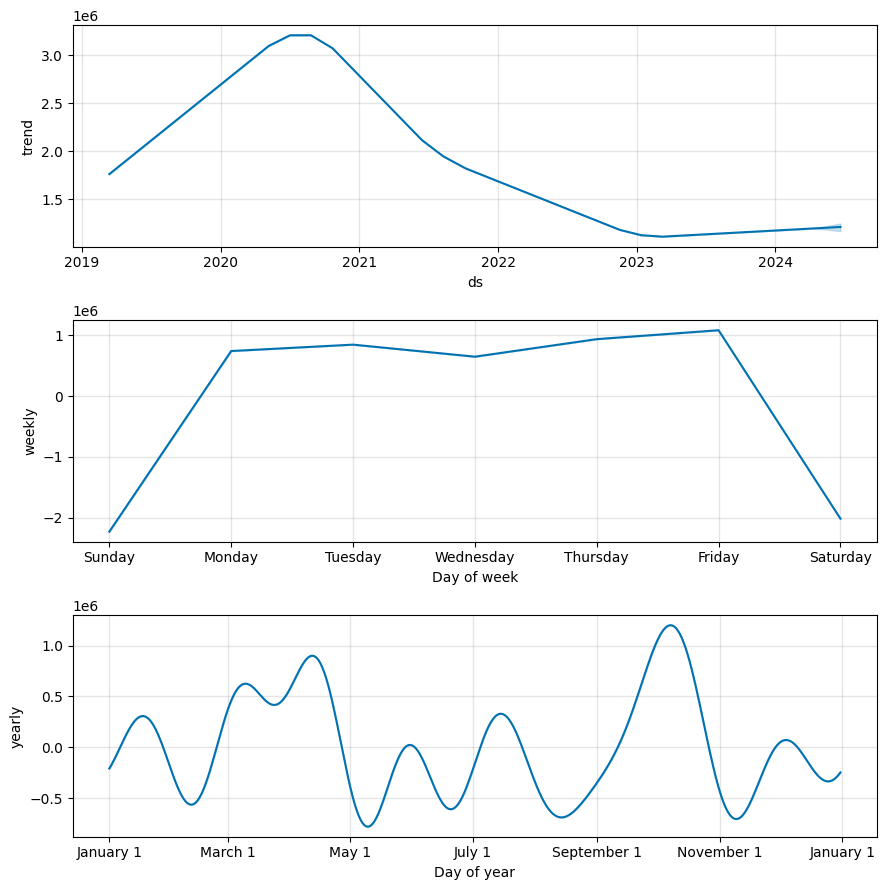

In [37]:
model.plot_components(prediction)
plt.show()

In [39]:
# find the accuracy along with the cross validation method
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model,horizon ='30 days', period ='15 days', initial ='90 days')

# horizon = future forecast required days
# period = for how many days once cross validation to be done
# initial =initial training period used to fit the model before the start of cross-validation.

INFO:prophet:Making 114 forecasts with cutoffs between 2019-06-23 00:00:00 and 2024-02-12 00:00:00


  0%|          | 0/114 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfaj7evps/qrlq3c6r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfaj7evps/jkmaqa2f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41629', 'data', 'file=/tmp/tmpfaj7evps/qrlq3c6r.json', 'init=/tmp/tmpfaj7evps/jkmaqa2f.json', 'output', 'file=/tmp/tmpfaj7evps/prophet_modelxiriw44a/prophet_model-20240320175828.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:58:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:58:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfaj7evps/zqwfjbyy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfaj7evps/ynvpdvue.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [40]:
df_cv
#yhat: Forecasted values (predicted values) generated by the model.
# y: Actual observed values of the target variable.

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-06-24,5.231242e+06,3.981594e+06,6.535145e+06,1382424,2019-06-23
1,2019-06-25,6.434621e+06,5.135278e+06,7.721257e+06,1386077,2019-06-23
2,2019-06-26,7.315893e+06,5.949560e+06,8.532721e+06,1762224,2019-06-23
3,2019-06-27,9.012542e+06,7.609446e+06,1.024539e+07,2813464,2019-06-23
4,2019-06-28,1.027242e+07,9.078027e+06,1.164261e+07,2372928,2019-06-23
...,...,...,...,...,...,...
2314,2024-03-06,2.440554e+06,6.379000e+05,4.406369e+06,1744204,2024-02-12
2315,2024-03-07,2.740671e+06,1.070899e+06,4.439028e+06,2688905,2024-02-12
2316,2024-03-11,2.574752e+06,6.534684e+05,4.301822e+06,2304068,2024-02-12
2317,2024-03-12,2.655207e+06,8.682010e+05,4.384196e+06,4039801,2024-02-12


In [41]:
#check performance
from prophet.diagnostics import performance_metrics

In [42]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,2.263462e+12,1.504481e+06,1.045853e+06,0.436110,0.327676,0.369307,0.837964
1,4 days,2.356137e+12,1.534971e+06,1.106089e+06,0.501349,0.356165,0.390308,0.836330
2,5 days,3.715201e+12,1.927486e+06,1.167091e+06,0.490916,0.328191,0.384297,0.857593
3,6 days,4.220012e+12,2.054267e+06,1.275157e+06,0.565126,0.337678,0.409556,0.832855
4,7 days,4.382504e+12,2.093443e+06,1.258029e+06,0.510163,0.330378,0.398856,0.826840
5,8 days,5.545117e+12,2.354807e+06,1.449819e+06,0.577159,0.367295,0.444285,0.774892
6,9 days,7.580396e+12,2.753252e+06,1.608854e+06,0.600781,0.388664,0.468693,0.730825
7,10 days,1.002878e+13,3.166825e+06,1.800605e+06,0.724630,0.413455,0.502543,0.696304
8,11 days,1.109552e+13,3.330993e+06,1.796132e+06,0.808690,0.413455,0.495421,0.687091
9,12 days,1.014571e+13,3.185234e+06,1.709193e+06,0.756766,0.391220,0.476260,0.702669


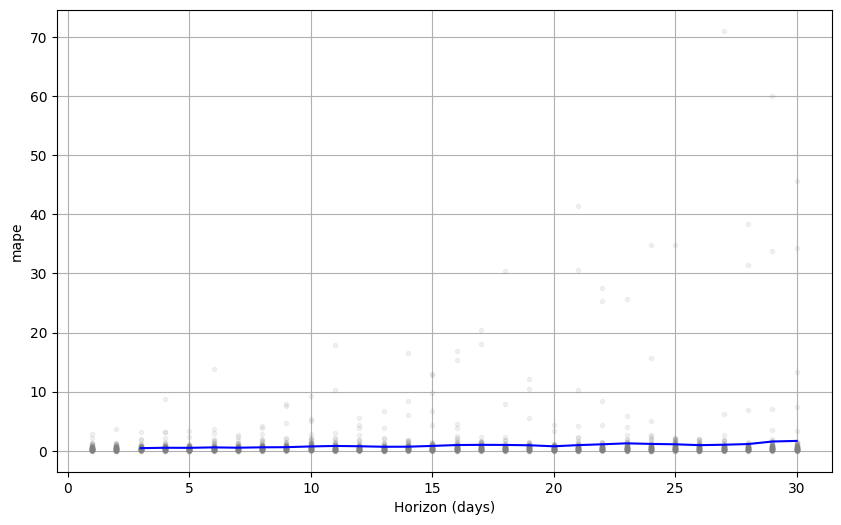

In [44]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv,metric='mape')
plt.show()